In [12]:
# Import required libraries
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import hvplot.pandas

In [2]:
# Read in the clean spotify data
file_path = Path("Resources/spotify_clean.csv")
df_spotify = pd.read_csv(file_path)

# Display sample data
df_spotify.head()

,track_name,track_artist,track_album_release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,...,playlist_subgenre_new jack swing,playlist_subgenre_permanent wave,playlist_subgenre_pop edm,playlist_subgenre_post-teen pop,playlist_subgenre_progressive electro house,playlist_subgenre_reggaeton,playlist_subgenre_southern hip hop,playlist_subgenre_trap,playlist_subgenre_tropical,playlist_subgenre_urban contemporary
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,2019-06-14,0.642049,1.201614,0.173200,1.367123,1,-0.481362,-0.333898,...,0,0,0,0,0,0,0,0,0,0
1,Memories - Dillon Francis Remix,Maroon 5,2019-12-13,0.490412,0.643317,1.557627,0.585766,1,-0.688642,-0.468670,...,0,0,0,0,0,0,0,0,0,0
2,All the Time - Don Diablo Remix,Zara Larsson,2019-07-05,0.138889,1.284529,-1.211227,1.100090,0,-0.324422,-0.436799,...,0,0,0,0,0,0,0,0,0,0
3,Call You Mine - Keanu Silva Remix,The Chainsmokers,2019-07-19,0.435271,1.279002,0.450085,0.984309,1,-0.050024,-0.667642,...,0,0,0,0,0,0,0,0,0,0
4,Someone You Loved - Future Humans Remix,Lewis Capaldi,2019-03-05,-0.033426,0.742815,-1.211227,0.685151,1,-0.702460,-0.432701,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df_spotify = df_spotify.set_index(['track_name', 'track_artist'])
df_spotify.head()

,,track_album_release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,playlist_subgenre_new jack swing,playlist_subgenre_permanent wave,playlist_subgenre_pop edm,playlist_subgenre_post-teen pop,playlist_subgenre_progressive electro house,playlist_subgenre_reggaeton,playlist_subgenre_southern hip hop,playlist_subgenre_trap,playlist_subgenre_tropical,playlist_subgenre_urban contemporary
track_name,track_artist,,,,,,,,,,,,,,,,,,,,,
I Don't Care (with Justin Bieber) - Loud Luxury Remix,Ed Sheeran,2019-06-14,0.642049,1.201614,0.173200,1.367123,1,-0.481362,-0.333898,-0.377953,-0.809230,...,0,0,0,0,0,0,0,0,0,0
Memories - Dillon Francis Remix,Maroon 5,2019-12-13,0.490412,0.643317,1.557627,0.585766,1,-0.688642,-0.468670,-0.359177,1.081061,...,0,0,0,0,0,0,0,0,0,0
All the Time - Don Diablo Remix,Zara Larsson,2019-07-05,0.138889,1.284529,-1.211227,1.100090,0,-0.324422,-0.436799,-0.377849,-0.519562,...,0,0,0,0,0,0,0,0,0,0
Call You Mine - Keanu Silva Remix,The Chainsmokers,2019-07-19,0.435271,1.279002,0.450085,0.984309,1,-0.050024,-0.667642,-0.377911,0.089582,...,0,0,0,0,0,0,0,0,0,0
Someone You Loved - Future Humans Remix,Lewis Capaldi,2019-03-05,-0.033426,0.742815,-1.211227,0.685151,1,-0.702460,-0.432701,-0.377953,-0.692585,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Set the X and y variables
X = df_spotify.drop(columns=['track_album_release_date', 'track_popularity', 'bangers'])
y = df_spotify['track_popularity']

In [6]:
def model_mse(X, y):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

    # Create a model with scikit-learn
    model = LinearRegression()

    # Fit the data into the model
    model.fit(X_train, y_train)

    # Create a prediction variable
    popularity_prediction = model.predict(X_test)

    # Evaluate the model using Mean Squared Error
    mse = mean_squared_error(y_test, popularity_prediction)
    return f'This model produces a Mean Squared Error of: {mse}'

model_mse(X,y)

'This model produces a Mean Squared Error of: 530.6364993985394'

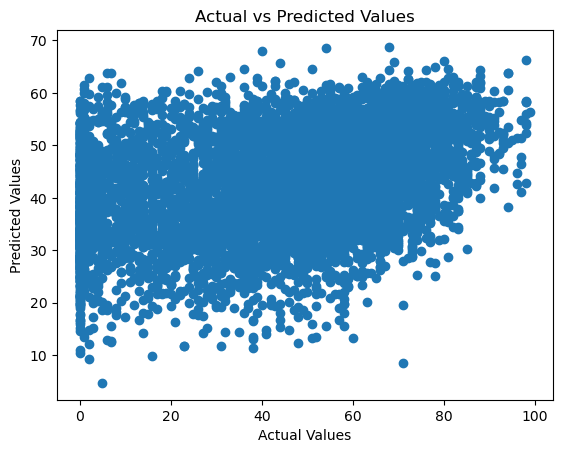

In [14]:
# Visualize the results
plt.scatter(y_test, popularity_prediction)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

In [15]:
df_spotify.columns

Index(['track_album_release_date', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'track_popularity', 'bangers',
       'playlist_genre_edm', 'playlist_genre_latin', 'playlist_genre_pop',
       'playlist_genre_r&b', 'playlist_genre_rap', 'playlist_genre_rock',
       'playlist_subgenre_album rock', 'playlist_subgenre_big room',
       'playlist_subgenre_classic rock', 'playlist_subgenre_dance pop',
       'playlist_subgenre_electro house', 'playlist_subgenre_electropop',
       'playlist_subgenre_gangster rap', 'playlist_subgenre_hard rock',
       'playlist_subgenre_hip hop', 'playlist_subgenre_hip pop',
       'playlist_subgenre_indie poptimism', 'playlist_subgenre_latin hip hop',
       'playlist_subgenre_latin pop', 'playlist_subgenre_neo soul',
       'playlist_subgenre_new jack swing', 'playlist_subgenre_permanent wave',
       'playlist_subgenre_pop edm', 'playl

In [7]:
music_variables = ['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms']

model_mse(df_spotify[music_variables], df_spotify['track_popularity'])

'This model produces a Mean Squared Error of: 573.7720956487855'

In [8]:
all_genres = ['playlist_genre_edm', 'playlist_genre_latin', 'playlist_genre_pop',
       'playlist_genre_r&b', 'playlist_genre_rap', 'playlist_genre_rock',
       'playlist_subgenre_album rock', 'playlist_subgenre_big room',
       'playlist_subgenre_classic rock', 'playlist_subgenre_dance pop',
       'playlist_subgenre_electro house', 'playlist_subgenre_electropop',
       'playlist_subgenre_gangster rap', 'playlist_subgenre_hard rock',
       'playlist_subgenre_hip hop', 'playlist_subgenre_hip pop',
       'playlist_subgenre_indie poptimism', 'playlist_subgenre_latin hip hop',
       'playlist_subgenre_latin pop', 'playlist_subgenre_neo soul',
       'playlist_subgenre_new jack swing', 'playlist_subgenre_permanent wave',
       'playlist_subgenre_pop edm', 'playlist_subgenre_post-teen pop',
       'playlist_subgenre_progressive electro house',
       'playlist_subgenre_reggaeton', 'playlist_subgenre_southern hip hop',
       'playlist_subgenre_trap', 'playlist_subgenre_tropical',
       'playlist_subgenre_urban contemporary']

model_mse(df_spotify[all_genres], df_spotify['track_popularity'])

'This model produces a Mean Squared Error of: 550.5613283331905'

In [9]:
main_genres =['playlist_genre_edm', 'playlist_genre_latin', 'playlist_genre_pop',
       'playlist_genre_r&b', 'playlist_genre_rap', 'playlist_genre_rock']

model_mse(df_spotify[main_genres], df_spotify['track_popularity'])

'This model produces a Mean Squared Error of: 600.34934593957'

In [10]:
subgenres = ['playlist_subgenre_album rock', 'playlist_subgenre_big room',
       'playlist_subgenre_classic rock', 'playlist_subgenre_dance pop',
       'playlist_subgenre_electro house', 'playlist_subgenre_electropop',
       'playlist_subgenre_gangster rap', 'playlist_subgenre_hard rock',
       'playlist_subgenre_hip hop', 'playlist_subgenre_hip pop',
       'playlist_subgenre_indie poptimism', 'playlist_subgenre_latin hip hop',
       'playlist_subgenre_latin pop', 'playlist_subgenre_neo soul',
       'playlist_subgenre_new jack swing', 'playlist_subgenre_permanent wave',
       'playlist_subgenre_pop edm', 'playlist_subgenre_post-teen pop',
       'playlist_subgenre_progressive electro house',
       'playlist_subgenre_reggaeton', 'playlist_subgenre_southern hip hop',
       'playlist_subgenre_trap', 'playlist_subgenre_tropical',
       'playlist_subgenre_urban contemporary']

model_mse(df_spotify[subgenres], df_spotify['track_popularity'])

'This model produces a Mean Squared Error of: 550.3990780769535'

In [20]:
def variable_test(X,y):
    # Reshape the X array
    X_reshaped = X.values.reshape(-1,1)

    # Create a model with scikit-learn
    model = LinearRegression()
    
    # Fit the data into the model
    model.fit(X_reshaped, y)

    # Make predictions using the X set
    predicted_y_values = model.predict(X_reshaped)

    # Compute metrics for the linear regression model: score, r2, mse, rmse, std
    score = model.score(X_reshaped, y, sample_weight=None)
    r2 = r2_score(y, predicted_y_values)
    mse = mean_squared_error(y, predicted_y_values)
    rmse = np.sqrt(mse)
    std = np.std(y)

    # Print relevant metrics.
    print(f"The r2 is {r2}.")
    print(f"The mean squared error is {mse}.")
    print(f"The root mean squared error is {rmse}.")
    print(f"The standard deviation is {std}.")

In [21]:
music_variables = ['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms']

for var in music_variables:
    print(f"\n----------{var}----------")
    variable_test(df_spotify[var], df_spotify['track_popularity'])


----------danceability----------
The r2 is 0.004192260933750247.
The mean squared error is 621.5682201993782.
The root mean squared error is 24.93126992753033.
The standard deviation is 24.98369401128743.

----------energy----------
The r2 is 0.011905326535265326.
The mean squared error is 616.7538406056724.
The root mean squared error is 24.834529200403065.
The standard deviation is 24.98369401128743.

----------key----------
The r2 is 4.229594385840585e-07.
The mean squared error is 624.1847024447362.
The root mean squared error is 24.98368872774267.
The standard deviation is 24.98369401128743.

----------loudness----------
The r2 is 0.003327798902697743.
The mean squared error is 622.1078044032276.
The root mean squared error is 24.942089014419533.
The standard deviation is 24.98369401128743.

----------mode----------
The r2 is 0.00011313675308255444.
The mean squared error is 624.1143481892321.
The root mean squared error is 24.982280684301667.
The standard deviation is 24.9836940